# Tasca M8 T01

*Clustering algorithms*

## Exercise 1

*Download the attached dataset from records of Facebook posts about Thailand, and classify the different records using the K-means algorithm.*

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [10]:
df.isnull()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7046,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7047,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7048,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [24]:
df_decoded = pd.get_dummies(df, columns=["status_type"])

In [25]:
features = df_decoded.drop(['status_id','status_published','Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [52]:
scaled_features

array([[ 0.64610394,  0.32335035,  1.6868788 , ..., -1.24599285,
        -0.23366611,  1.42146599],
       [-0.17319166, -0.25220622, -0.3041444 , ...,  0.80257282,
        -0.23366611, -0.70349907],
       [-0.00673846,  0.01308938,  0.12901714, ..., -1.24599285,
        -0.23366611,  1.42146599],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ...,  0.80257282,
        -0.23366611, -0.70349907],
       [ 0.26131603, -0.23871662, -0.13695924, ...,  0.80257282,
        -0.23366611, -0.70349907],
       [-0.46070173, -0.25220622, -0.3041444 , ...,  0.80257282,
        -0.23366611, -0.70349907]])

In [48]:
from sklearn.decomposition import PCA

pca = PCA(.95)
principalComponents = pca.fit_transform(scaled_features)

In [49]:
#number of components chosen with 95% of the variance
pca.n_components_

9

In [50]:
principalComponents

array([[ 2.8751844 , -0.45902849, -0.70952712, ..., -0.41634243,
         0.33747418, -0.43610014],
       [-1.02178058,  0.26702925,  0.68058815, ..., -0.04605451,
        -0.13170456, -0.06184161],
       [ 0.89152259, -0.82461249, -1.26928917, ..., -0.01095043,
         0.3712665 ,  0.25213889],
       ...,
       [-1.1627642 , -0.13454408,  0.7819948 , ..., -0.06205713,
        -0.10678169, -0.08249372],
       [-0.71873959,  0.78059569,  0.5853789 , ..., -0.04792302,
        -0.19973375, -0.09677584],
       [-1.15797576, -0.09109934,  0.76732845, ..., -0.05944075,
        -0.10965097, -0.07839549]])

In [36]:
kmeans = KMeans(
            init="random",
            n_clusters=3,
            n_init=10,
            max_iter=300,
            random_state=42
        )

In [37]:
kmeans.fit(principalComponents)

KMeans(init='random', n_clusters=3, random_state=42)

In [39]:
#Statistics from the initialization

# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

59221.844644528595
[[-0.83690727  0.42235062  0.4474035   0.17997129  0.1288658  -0.08907061
  -0.05412675 -0.11963076 -0.06039123]
 [ 1.05391184 -0.89451871 -1.18446113 -0.46377768 -0.32579149  0.16762741
   0.11300476  0.31162784  0.1666618 ]
 [ 8.32975179 -0.33173052  2.17768627  0.74060649  0.46314776  0.29438124
   0.05994973 -0.52800924 -0.36634969]]
25


In [40]:
#first five predicted labels:
kmeans.labels_[:5]

array([1, 0, 1, 0, 0], dtype=int32)

## Exercise 2

*Classify the different records using the hierarchical clustering algorithm.*

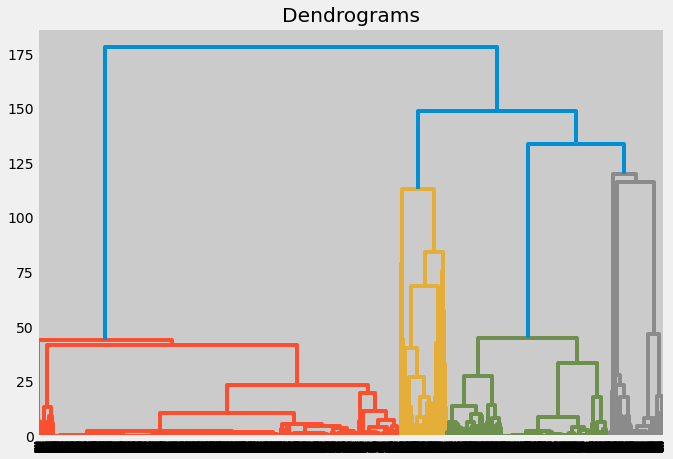

In [82]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendrogram = sch.dendrogram(sch.linkage(principalComponents, method='ward'))

In [103]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(principalComponents)
labels = model.labels_

In [104]:
labels

array([0, 3, 1, ..., 3, 3, 3])

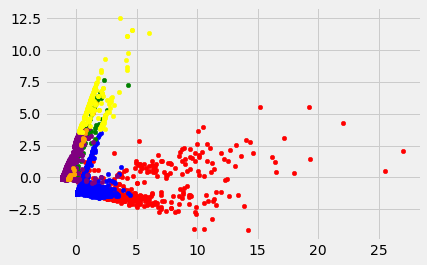

In [105]:
plt.scatter(principalComponents[labels==0, 0], principalComponents[labels==0, 1], s=20, marker='o', color='red')
plt.scatter(principalComponents[labels==1, 0], principalComponents[labels==1, 1], s=20, marker='o', color='blue')
plt.scatter(principalComponents[labels==2, 0], principalComponents[labels==2, 1], s=20, marker='o', color='green')
plt.scatter(principalComponents[labels==3, 0], principalComponents[labels==3, 1], s=20, marker='o', color='purple')
plt.scatter(principalComponents[labels==4, 0], principalComponents[labels==4, 1], s=20, marker='o', color='orange')
plt.scatter(principalComponents[labels==5, 0], principalComponents[labels==5, 1], s=20, marker='o', color='yellow')
plt.show()

## Exercise 3

*Calculate the clustering performance using a parameter such as silhouette.*

In [53]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

### The silhouette coefficient

In [67]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 12):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(principalComponents)
        score = silhouette_score(principalComponents, kmeans.labels_)
        silhouette_coefficients.append(score)

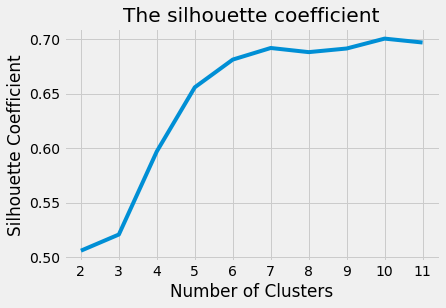

In [76]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.title('The silhouette coefficient')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

*According to the silhouette coefficient the best choice for k is 7 or 10 since they have the maximum score*

### The elbow method

In [70]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalComponents)
    sse.append(kmeans.inertia_)

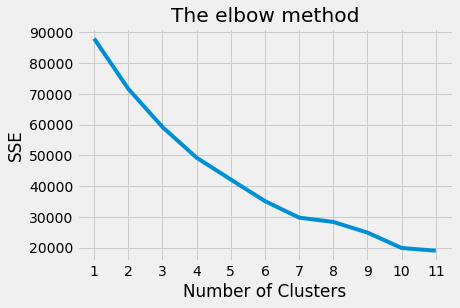

In [77]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), sse)
plt.xticks(range(1, 12))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [74]:
from kneed import KneeLocator

kl = KneeLocator(
   range(1, 12), sse, curve="convex", direction="decreasing"
)

In [75]:
print('According to the elbow point is: ', kl.elbow)

According to the elbow point is:  6
